In [5]:
#Loading Dependencies 
import pandas as pd
import numpy as np
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

In [3]:
#Importing DATA
data1 = pd.read_csv("data_exercise_40_standardized.csv", usecols = range(1,120), header = 0)
data1 = data1.fillna(0)
s1 = pd.read_csv("data_exercise_40_standardized.csv", usecols = range(120,121) , header = 0)

#Split dataset
seed = 0
test_size = .2
X_train, X_test, y_train, y_test = train_test_split(data1, s1, test_size=test_size, random_state=seed)

#fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train.values.ravel())
#make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
#evaluate predictions
accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
#print(classification_report(y_test, predictions))

Accuracy: 74.39%
              precision    recall  f1-score   support

        40.0       0.79      0.98      0.87       343
        45.0       0.00      0.00      0.00        19
        50.0       0.44      0.13      0.21        30
        55.0       0.00      0.00      0.00        16
        60.0       0.20      0.07      0.10        15
        65.0       0.17      0.06      0.09        17
        75.0       0.52      0.46      0.49        48

    accuracy                           0.74       488
   macro avg       0.30      0.24      0.25       488
weighted avg       0.64      0.74      0.68       488



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kappa score:   0.3189151770262273


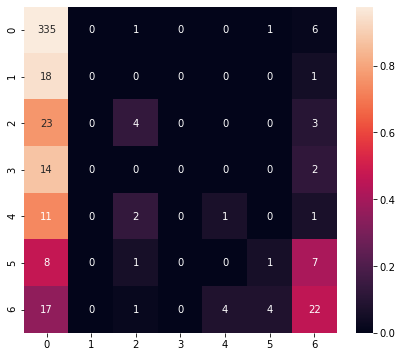

In [6]:
cm = confusion_matrix(y_test, predictions)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g')

plot_confusion_matrix(cm)

print( "kappa score:  ", cohen_kappa_score(y_test, predictions))

kappa score:   1.0


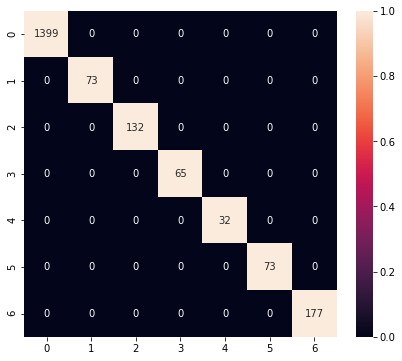

In [7]:
#confusion matrix and kappa score for training set

y_train_pred = model.predict(X_train)
predictions1 = [round(value) for value in y_train_pred]


cm1 = confusion_matrix(y_train, predictions1)

def plot_confusion_matrix(cm1, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm1 = cm1
    if normalized:
        norm_cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm1, annot=cm1, fmt='g')

plot_confusion_matrix(cm1)

print( "kappa score:  ", cohen_kappa_score(y_train, predictions1))